In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq #Seq burada Biopython kutuphanesinin icinde yer alan siniflardan birine ait bir obje

Biraz transkripsiyon nedir, ogrenelim.

Transkripsiyon, yazılma veya yazılım, DNA'yı oluşturan nükleotit dizisinin RNA polimeraz enzimi tarafından bir RNA dizisi olarak kopyalanması sürecidir. Başka bir deyişle, DNA'dan RNA'ya genetik bilginin aktarımıdır. Peki nasil gerceklesir? Template DNA'dan reverse complement ile mRNA dizisi elde edilir (TCAG -> CUGA). Biopyton kullanirken ise genellikle coding DNA'yi direkt olarak kullaniriz; cunku bu sekilde T -> U cevirimi ile mRNA dizisini kolayca elde edebiliriz.   

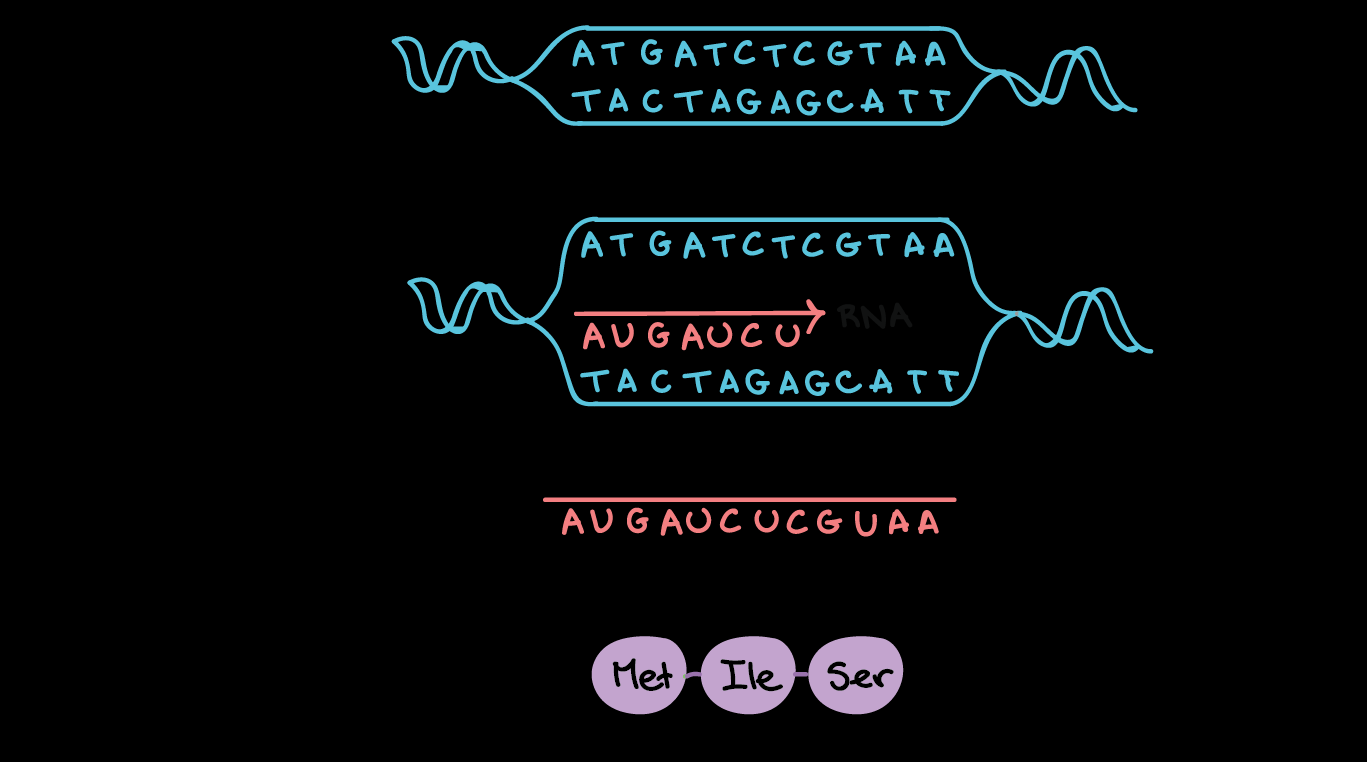

In [ ]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print('coding DNA:', coding_dna)
template_dna = coding_dna.reverse_complement()
print('reverse complement of the coding DNA:', template_dna)

In [ ]:
#reverse complement problem

def rev_complement(sequence):
    '''bir DNA dizisi alir ve onun reverse complement dizisini uretir.'''
    compl = ''
    sequence = sequence.lower() #dikkat!
    for letter in sequence:
        if letter == 'a':
            compl += 't'
        elif letter == 'c':
            compl += 'g'
        elif letter == 't':
            compl += 'a'
        else:
            compl += 'c'
    return compl[::-1].upper()

print(rev_complement(coding_dna))

In [ ]:
#ne demek istedigimi simdi anlayacaksiniz
messenger_rna = coding_dna.transcribe()
messenger_rna

In [ ]:
#Eger template DNA'dan reverse complement elde edip sonra transkripsiyon yapacaksaniz iki islemde yapabilirsiniz
template_dna.reverse_complement().transcribe()

In [ ]:
#isterseniz mRNA dizisini orjinal DNA dizisine geri cevirebilirsiniz

messenger_rna.back_transcribe()

In [ ]:
## Translasyon
#Peki mRNA'dan protein nasil elde edebiliriz? 
messenger_rna.translate()

*stop karakteri

Ama burada sekansin icinde de bu karakter var, bu sikintili bir durum. 

Translasyon islemini dogru bir sekilde gerceklestirebilmek icin hangi genetik kodu kullanacagimizi bilmemiz lazim. 

Yukardaki ornek bir mitokondriyal DNA ornegi, o yuzden uygun olabilecek bir genetik kod: Omurgali mitokondriyel kodu. Bakalim.



In [ ]:
coding_dna.translate(table="Vertebrate Mitochondrial") #evet, bu ise yaradi

In [ ]:
#su anda bir bakteriyel DNA dizisine bakiyorsunuz. Bu bir CDS, yani coding sequence. 
#Bu da su demek: Tamami aminoasit dizisine cevrilebilen DNA dizisi. 

gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA" +
           "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT" + 
           "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT" + 
           "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT" + 
           "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA")
gene.translate(table="Bacterial")


In [ ]:
gene.translate(table="Bacterial", to_stop=True) #istersek stop kodonunu susturabiliriz

In [ ]:
gene.translate(table="Bacterial", cds=True) #peki gercekten bir cds mi elimizdeki data?

# Bakteri genetik koduna gore GTG baslangic kodonu ve normalde Valine aminoasidini kodluyor. Ama biz sekansin CDS oldugunu ozellikle belirtirsek Valine yerine methionine aminoasidini kodluyor.  


In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
bacterial_table_check = CodonTable.unambiguous_dna_by_name["Bacterial"]

In [ ]:
print(standard_table)

In [ ]:
print(bacterial_table_check)

In [ ]:
print(mito_table)

In [ ]:
#bilmekte fayda var
print(mito_table.stop_codons)
print(mito_table.start_codons)

In [ ]:
#sequence source: https://www.ncbi.nlm.nih.gov/nuccore/HQ440980.1?report=fasta
midge_seq = Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT")

In [ ]:
midge_seq.translate(table="Bacterial") #buradaki sorun ne?

In [ ]:
midge_seq.translate(table="Mitochondrial") #buradaki sorun ne?

In [ ]:
help(CodonTable)

In [ ]:
midge_seq.translate(table="Invertebrate Mitochondrial")

In [ ]:
# Artik genetik dizileri karsilastirmaya gecebiliriz. 
from Bio.Seq import Seq
seq1 = Seq("ACGT")
seq2 = Seq("ACGT")


In [ ]:
print(seq1 == seq2)
print(seq1 == seq1)

In [ ]:
my_seq = Seq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")

In [ ]:
my_seq2 = "GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA"
type(my_seq2)

In [ ]:
print(type(my_seq) == type(my_seq2))

In [ ]:
my_seq[5] = 'G'
#sekansta degisiklik yapamiyor olmak iyi bir sey
#analiz yaparken asil datayi kontrolsuzce degistirmek iyi bir fikir degil

In [ ]:
my_seq2[5] = "G"

In [ ]:
#sekans uzerinde oynamak istersek tomutable() metodu kullanisli. 
mutable_seq = my_seq.tomutable()
mutable_seq

In [ ]:
mutable_seq[5] = "G"
mutable_seq

In [ ]:
#alternatif olarak string uzerinde de Bio.Seq icindeki metotlari uygulayarak bircok biyolojik bilgi elde edebiliriz
from Bio.Seq import reverse_complement, transcribe, back_transcribe, translate
my_string = "GCTGTTATGGGTCGTTGGAAGGGTGGTCGTGCTGCTGGTTAG"
print(reverse_complement(my_string))
print(transcribe(my_string))
print(back_transcribe(my_string))
print(translate(my_string))

In [ ]:
# Sekans bilgileri (sequence annotation)
from Bio.SeqRecord import SeqRecord

In [ ]:
help(SeqRecord)

In [ ]:
SeqRecord(Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT"), id='HQ440980.1')

In [ ]:
midge_seq = Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT")
midge_seq.id = "HQ440980.1"
midge_seq.description = "Chironomidae gen. nr. Brundiniella sp. 1 SRM-2010 voucher AFTP1 cytochrome oxidase subunit I (COI) gene"
print(midge_seq.description)


In [ ]:
record = SeqIO.read("../data/ls_orchid.gbk", "genbank")
record

In [ ]:
#parse metodunu kullanalim
for seq_record in list(SeqIO.parse("../data/ls_orchid.gbk", "genbank")):
    print(seq_record)

In [ ]:
seq_record

In [ ]:
seq_record.id

In [ ]:
seq_record.description

In [ ]:
len(seq_record.annotations)

In [ ]:
print(seq_record.format("fasta"))

In [ ]:
#sekans dosyasini okumaya baslayalim
from Bio import SeqIO

#ilk 5 sekansa bakalim
for i, seq_record in enumerate(SeqIO.parse("../data/ls_orchid.fasta", "fasta")):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    if i == 4:
        break

In [ ]:
#yukardaki ornek indirdigimiz fasta dosyasi icindi, genbank formatindaki dosyadaki ilk 5 sekansa bakmak istersek:

from Bio import SeqIO

for i, seq_record in enumerate(SeqIO.parse("../data/ls_orchid.gbk", "genbank")):
    print(seq_record.id)
    print(seq_record.seq)
    print(len(seq_record))
    if i == 4:
        break

In [ ]:
#Peki fasta ya da genbank formatinda degil de baska formatta ise dosyalarimiz?
help(SeqIO)

In [ ]:
from Bio import SeqIO 

#list comprehension ile de belli bilgilere erisebiliriz
identifiers=[seq_record.id for seq_record in SeqIO.parse("../data/ls_orchid.gbk", "genbank")][:5]  # ilk bes tanimlayici
identifiers

In [ ]:
#Genbank formatli sekans dosyasindaki butun kayitlara (record) bakalim

from Bio import SeqIO

records = list(SeqIO.parse("../data/ls_orchid.gbk", "genbank"))

print("Found %i records" % len(records))

print("The last record")
last_record = records[-1] #bunu kimler hatirliyor?
print(last_record.id)
print(repr(last_record.seq))
print(len(last_record))

print("The first record")
first_record = records[0] #Python'da sayma islemi 0'dan basliyor  
print(first_record.id)
print(repr(first_record.seq))
print(len(first_record))